#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mufidatuln/Laporan-Proyek-Machine-Learning-1/main/dataset/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


Terdapat 9 Kolom dengan 5 kolom bertipe data integer, 3 kolom bertipe data float dan satu fitur target bertipe data object

In [ ]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Kita bisa melihat persebaran data secara umum pada setiap kolom

## Cleaning Data Null

In [ ]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

Pada Dataset ini tidak ditemukan nilai null

## Cleaning Data Duplikat

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data duplikat dalam dataset

#Univeariate Analisis

In [ ]:
categorical_features= ['Result','Gender']

###Perserbaran Jumlah Diagnosis Berdasarkan Gender

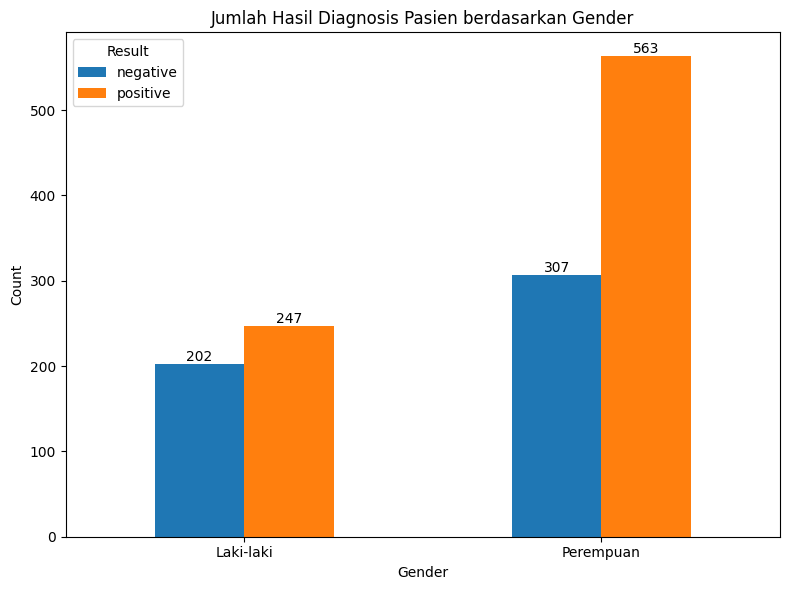

In [ ]:
# Membuat tabel silang
cross_tab = pd.crosstab(df["Gender"], df["Result"])

# Membuat subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Melakukan visualisasi bar plot untuk tabel silang "Gender" vs "Result"
cross_tab.plot(kind="bar", ax=ax)
ax.set_title("Jumlah Hasil Diagnosis Pasien berdasarkan Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.legend(title="Result")
ax.set_xticklabels(['Laki-laki', 'Perempuan'], rotation=0)
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


In [ ]:
df.groupby("Age").agg({
    "Result": lambda x: (x == "positif").count()
})

,Result
Age,
14,1
19,3
20,3
21,4
22,3
...,...
88,1
90,3
91,1


In [ ]:
# Buat DataFrame contoh
# df = pd.DataFrame({'umur': [10, 25, 40, 60, 80]})

# Tentukan batas-batas untuk segmentasi umur
bins = [0, 12, 21, 60, 100]
labels = ['Anak-Anak', 'Remaja', 'Dewasa', 'Tua']

# Gunakan pd.cut untuk membuat kolom baru dengan kategori umur
df['segment_umur'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,segment_umur
0,63,1,66,160,83,160.0,1.80,0.012,negative,Tua
1,20,1,94,98,46,296.0,6.75,1.060,positive,Remaja
2,56,1,64,160,77,270.0,1.99,0.003,negative,Dewasa
3,66,1,70,120,55,270.0,13.87,0.122,positive,Tua
4,54,1,64,112,65,300.0,1.08,0.003,negative,Dewasa
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,Dewasa
1315,66,1,84,125,55,149.0,1.33,0.172,positive,Tua
1316,45,1,85,168,104,96.0,1.24,4.250,positive,Dewasa
1317,54,1,58,117,68,443.0,5.80,0.359,positive,Dewasa


Menambahkan satu fitur dengan nama segment_umur untuk mengkategorikan umur

In [ ]:
segmentasi_umur = df.groupby("segment_umur").agg({
    "Result": lambda x: (x == "positif").count()
})

segmentasi = pd.DataFrame(segmentasi_umur).reset_index()
segmentasi

,segment_umur,Result
0,Anak-Anak,0
1,Remaja,7
2,Dewasa,692
3,Tua,617


##Jumlah Pasien Positif Memiliki Penyakit Jantung Berdasarkan Segmentasi Umur

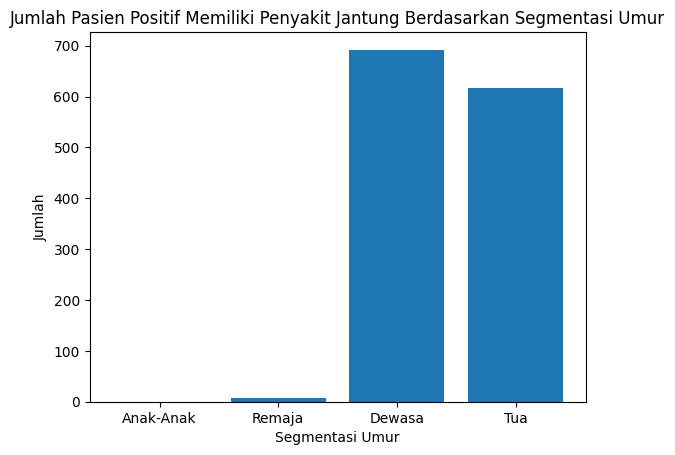

In [ ]:
# Buat bar chart
plt.bar(segmentasi['segment_umur'], segmentasi['Result'])

# Tambahkan label dan judul
plt.xlabel('Segmentasi Umur')
plt.ylabel('Jumlah')
plt.title('Jumlah Pasien Positif Memiliki Penyakit Jantung Berdasarkan Segmentasi Umur')

# Tampilkan bar chart
plt.show()

In [ ]:
numerical_features = ['Age','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']

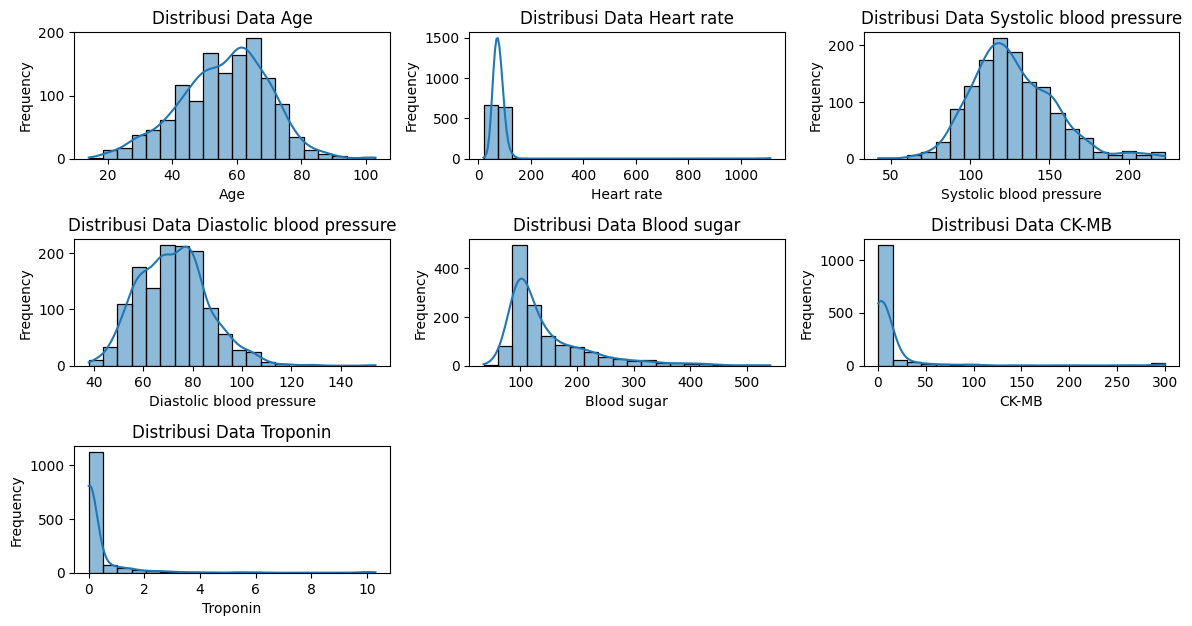

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribusi Data {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Usia: Distribusi usia tampak miring ke kanan, dengan lebih banyak orang dalam kelompok usia yang lebih tua. Denyut jantung, tekanan darah sistolik, tekanan darah diastolik: Distribusi faktor-faktor ini juga tampak miring ke kanan. Gula darah: Distribusi gula darah tampaknya relatif normal.

#Multivariate Analisis

Scatterplot untuk melihat persebaran data antara 2 fitur atau lebih

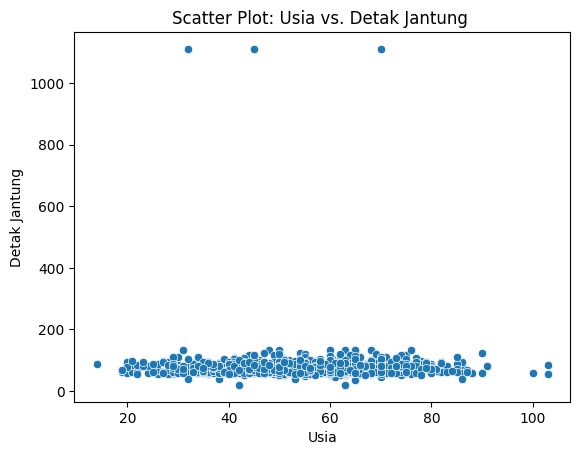

In [ ]:
data = df
# Scatter plot: Age vs. Heart rate
sns.scatterplot(x='Age', y='Heart rate', data=data)
plt.title('Scatter Plot: Usia vs. Detak Jantung ')
plt.xlabel('Usia')
plt.ylabel('Detak Jantung')
plt.show()


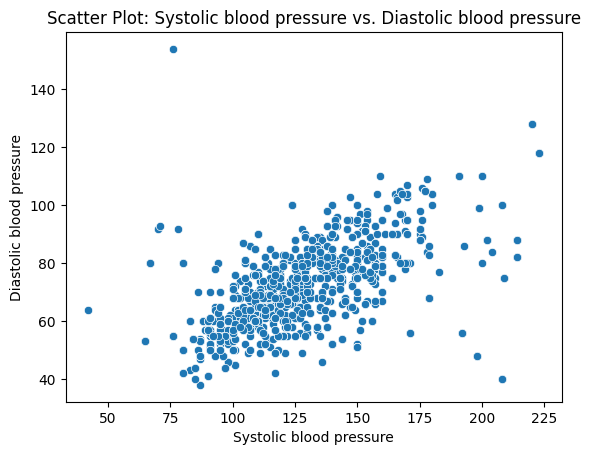

In [ ]:
# Scatter plot: Systolic blood pressure vs. Diastolic blood pressure
sns.scatterplot(x='Systolic blood pressure', y='Diastolic blood pressure', data=data)
plt.title('Scatter Plot: Systolic blood pressure vs. Diastolic blood pressure')
plt.xlabel('Systolic blood pressure')
plt.ylabel('Diastolic blood pressure')
plt.show()

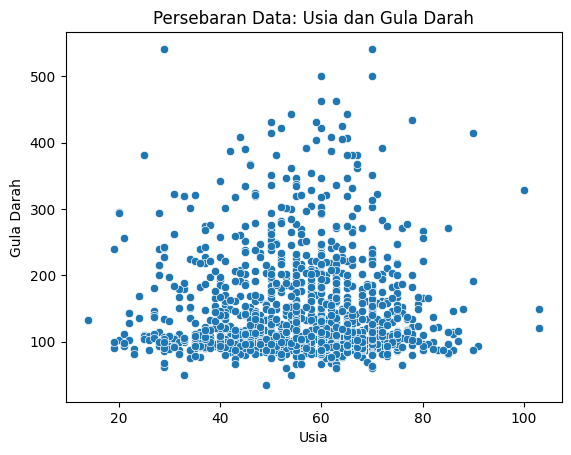

In [ ]:
# Scatter plot: Age vs. Blood sugar
data = df
sns.scatterplot(x='Age', y='Blood sugar', data=data)
plt.title('Persebaran Data: Usia dan Gula Darah')
plt.xlabel('Usia')
plt.ylabel('Gula Darah')
plt.show()

Terdapat korelasi positif yang lemah antara usia dan gula darah. Ini berarti bahwa dengan bertambahnya usia, gula darah juga cenderung meningkat. Namun, korelasinya lemah, sehingga ada banyak variabilitas dalam data.

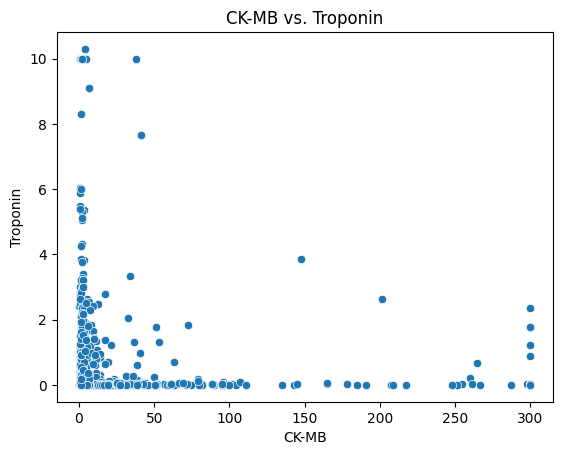

In [ ]:

# Scatter plot: CK-MB vs. Troponin
sns.scatterplot(x='CK-MB', y='Troponin', data=data)
plt.title('CK-MB vs. Troponin')
plt.xlabel('CK-MB')
plt.ylabel('Troponin')
plt.show()

Terdapat korelasi positif yang lemah antara kadar CK-MB dan kadar troponin. Ini berarti bahwa dengan meningkatnya kadar CK-MB, kadar troponin juga cenderung meningkat, tetapi korelasinya lemah.

##Data Preprosessing

Pada tahap ini dilakukan data preprosessing dengan split dataset dan melakukan standarisasi data

In [ ]:
#Copy the DataFrame for preprocessing
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed.drop('segment_umur',axis=1)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df_preprocessed['Result'] = label_encoder.fit_transform(df_preprocessed['Result'])

# Split the data into training and test sets
X = df_preprocessed.drop('Result', axis=1)
y = df_preprocessed['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize or standardize numerical attributes
scaler = StandardScaler()
numerical_cols = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the processed training data
X_train.head()



,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
598,-1.035869,0.719712,0.101709,1.012203,1.322291,-0.651508,-0.213444,-0.310036
1213,1.463736,0.719712,1.175163,-0.617725,-0.234964,-0.730903,-0.277728,-0.284726
209,0.287451,0.719712,-0.214012,-3.295463,-0.588885,-0.545649,-0.308747,0.072336
538,-0.300691,-1.389444,0.227998,0.119624,0.543664,0.446783,-0.286466,-0.294669
140,-0.815316,-1.389444,0.017517,-1.549112,-1.792218,-0.863227,-0.277520,-0.310036


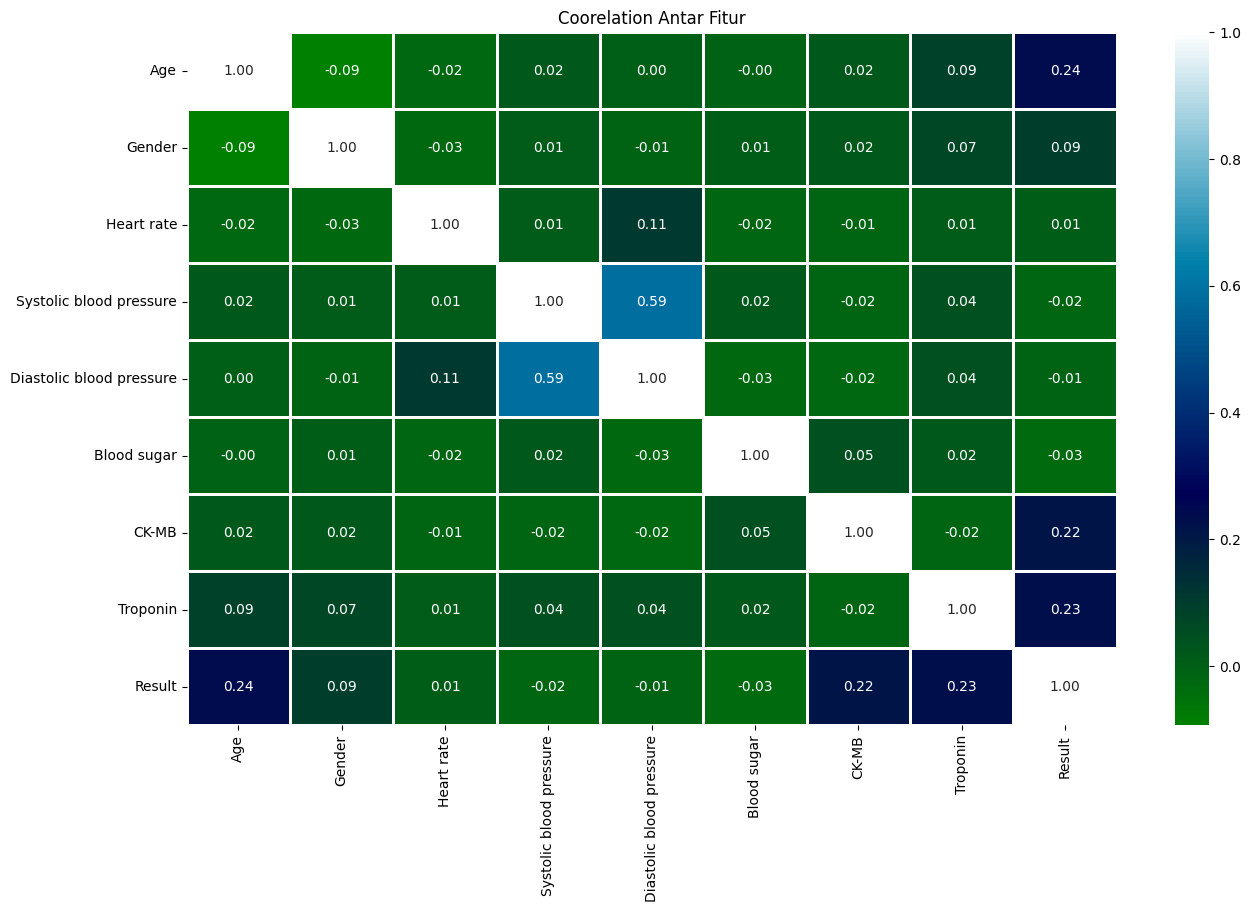

In [ ]:
data = df_preprocessed.corr()

plt.figure(figsize=(15, 9))  # Optional: Adjust figure size
sns.heatmap(data, annot=True, cmap='ocean', linewidths=2, fmt=".2f", annot_kws={"size": 10})

# Add labels and title (customize as needed)
plt.title("Coorelation Antar Fitur")

# Show the plot
plt.show()

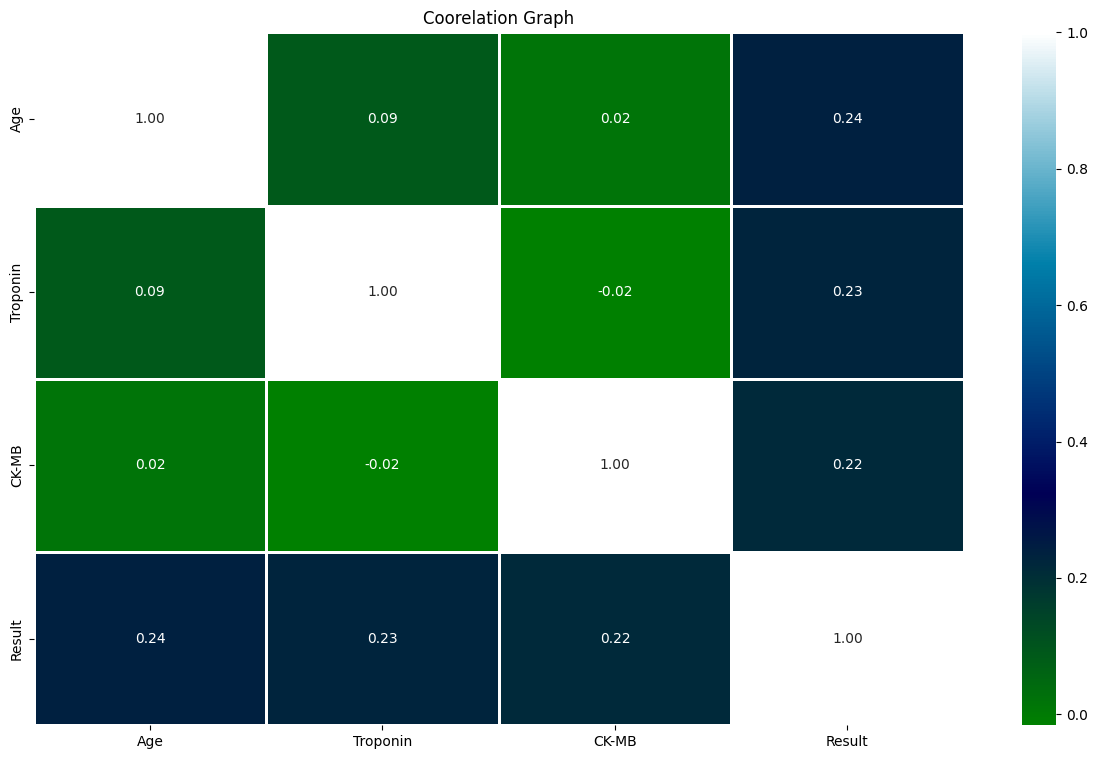

In [ ]:
data = df_preprocessed[['Age','Troponin','CK-MB','Result']].corr()

plt.figure(figsize=(15, 9))  # Optional: Adjust figure size
sns.heatmap(data, annot=True, cmap='ocean', linewidths=2, fmt=".2f", annot_kws={"size": 10})

# Add labels and title (customize as needed)
plt.title("Coorelation Graph")

# Show the plot
plt.show()

#Model dan Evaluasi



In [ ]:
#Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')



##Logistic Regression

In [ ]:
# Train and evaluate each model
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
log_reg_scores = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'AUC-ROC': roc_auc_score(y_test, y_proba_log_reg)
}
log_reg_df = pd.DataFrame([log_reg_scores])
log_reg_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.799242,0.819767,0.865031,0.841791,0.884863


## Random Forest

In [ ]:
# Train and evaluate each model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
rf_scores = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, y_proba_rf)
}
rf_df = pd.DataFrame([rf_scores])
rf_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.981061,0.981707,0.98773,0.984709,0.989552


##XGBClassifier

In [ ]:
# Train and evaluate each model
xgb_clf.fit(X_train, y_train)
y_pred_xgb_clf = xgb_clf.predict(X_test)
y_proba_xgb_clf = xgb_clf.predict_proba(X_test)[:, 1]
xgb_clf_scores = {
    'Model': 'XGBClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_xgb_clf),
    'Precision': precision_score(y_test, y_pred_xgb_clf),
    'Recall': recall_score(y_test, y_pred_xgb_clf),
    'F1-Score': f1_score(y_test, y_pred_xgb_clf),
    'AUC-ROC': roc_auc_score(y_test, y_proba_xgb_clf)
}
xgb_clf_df = pd.DataFrame([xgb_clf_scores])
xgb_clf_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,XGBClassifier,0.981061,0.981707,0.98773,0.984709,0.992529
